In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Handling 'Rate' Attribute

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Information about handling rate attritube
1. This is 'object' dtype feature.
2. The missing values, such as NEW and -, were replaced by 0 as they dont have any rating.
3. The np.nan values were replaced by the statistical mode of the feature.
4. Lastly the feature was converted into dtype 'float'

In [7]:
df['rate'].replace(['NEW', '-'], '0/5', inplace=True)
df['rate'].fillna(df['rate'].mode()[0], inplace=True)

In [8]:
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0])

In [9]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [10]:
df['rate'] = df['rate'].astype('float')

## Handling 'phone' attribute

In [11]:
df['phone']

0          080 42297555\r\n+91 9743772233
1                            080 41714161
2                          +91 9663487993
3                          +91 9620009302
4        +91 8026612447\r\n+91 9901210005
                       ...               
51712                        080 40301477
51713                      +91 8197675843
51714                                 NaN
51715                        080 49652769
51716                      +91 8071117272
Name: phone, Length: 51717, dtype: object

### Information about changing the feature 'phone'

1. Cleaning values & changing them to a better format by adding '-' to code and phone number.
   Eg - +91 987xxxx654 is changed to +91-987xxxx654.

2. Any escape sequences, such as \r and \n, are removed. 

3. Two numbers are seperated by a Comma.

4. np.nan values are replaced 'N/A' because we dont have any information about phone numbers and we cannot put any random phone number or replace it with a statistical value like mean, median or mode.

In [12]:
new_values = []
for i in df['phone']:
    if type(i) == str:
        val = i.replace('\r',' ')
        val = val.replace('\n', ' ')
        li = val.split()
        temp = []
        for item in li:
            if len(item) == 8:
                temp.append('080-'+item)
            elif len(item) == 10:
                temp.append('+91-'+item)
        new_values.append(', '.join(temp))
    else:
        new_values.append('N/A')
df['phone'] = new_values

In [13]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"080-42297555, +91-9743772233",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080-41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91-9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91-9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,"+91-8026612447, +91-9901210005",Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080-40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,0,+91-8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,N/A,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080-49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## Handling duplicates

In [14]:
df.duplicated().sum()

0

The above data has no duplicated entries.

## Handling 'online_order' feature

In [15]:
df['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [16]:
df['online_order'].isnull().sum()

0

*There are no missing values in 'online_order' feature*

## *Plotting Online Order vs Offline Order Bar Chart*

In [17]:
zomato_color_code = '#cb202d'

In [18]:
index = df['online_order'].value_counts().index
values = df['online_order'].value_counts().values

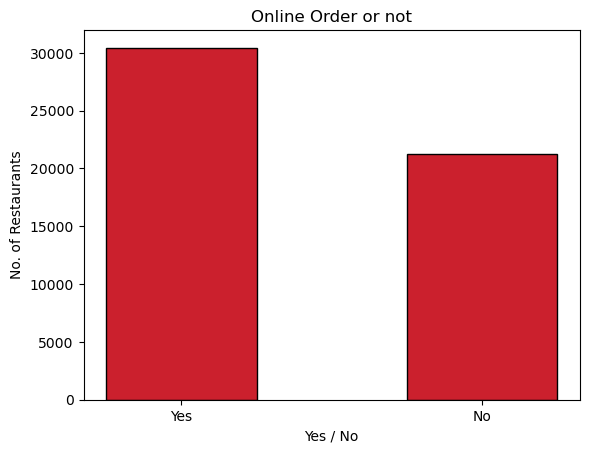

In [29]:
plt.bar(index, values, width=0.5, color = zomato_color_code, edgecolor='black')
plt.title('Online Order or not')
plt.xlabel('Yes / No')
plt.ylabel('No. of Restaurants')
plt.show()

## Handling 'location' feature

In [20]:
df['location'].isnull().sum()

21

In [21]:
for x in range(10):
    print(df['location'][x],':  ', df['address'][x])

Banashankari :   942, 21st Main Road, 2nd Stage, Banashankari, Bangalore
Banashankari :   2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore
Banashankari :   1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore
Banashankari :   1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore
Basavanagudi :   10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi, Bangalore
Basavanagudi :   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar Main Road, Basavanagudi, Bangalore
Mysore Road :   19/1, New Timberyard Layout, Beside Satellite Bus Stop, Mysore Road, Bangalore
Banashankari :   2469, 3rd Floor, 24th Cross, Opposite BDA Complex, 2nd Stage, Banashankari, Bangalore
Banashankari :   1, 30th Main Road, 3rd Stage, Banashankari, Bangalore
Banashankari :   2470, 21 Main Road, 25th Cross, Banashankari, Bangalore


### Conclusion

Since the location of restaurant is given in the address of the restaurant which is the string in between the second last and last comma of the address. *So we can replace the nan values in Location with the same.*

In [22]:
df[df['location'].isnull()][['address','location']]

,address,location
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",NaN
9874,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",NaN
13693,"Chandapura- Anakal Main Road, Oppsite Vemana H...",NaN
16351,"Kudlu Gate, Bommanahalli, Bangalore",NaN
26432,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",NaN
26519,"Koramangala 8th Block, Bangalore",NaN
27672,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN
28611,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN
29298,"Koramangala 8th Block, Bangalore",NaN
30604,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN


* *Here each restaurant with NaN Location has an address.* 
*  *So, we can replace the nan values with the second last element of the list created by splitting address with ','.*

In [24]:
for x in df[df['location'].isnull()]['address'].index:
    df.at[x, 'location'] = df['address'][x].split(',')[-2].replace(' ','')

In [25]:
df['location'].isnull().sum()

0

## *Plotting Online Order or Not according to Location*
Only locations with more than 1000 restaurants are plotted.

In [26]:
#Creating List of Locations with more than 1000 restaurants
location_list = [location for location in df['location'].unique() if df['location'].value_counts()[location]>1000]

#Creating Lists with Yes & No frequencies of each location
online_by_location = df.groupby(['location'])['online_order'].value_counts()
yes_values = []
no_values = []
for location in location_list:
    if 'Yes' in online_by_location[location]:
        yes_values.append(online_by_location[location]['Yes'])
    else:
        yes_values.append(0)
    if 'No' in online_by_location[location]:
        no_values.append(online_by_location[location]['No'])
    else:
        no_values.append(0)

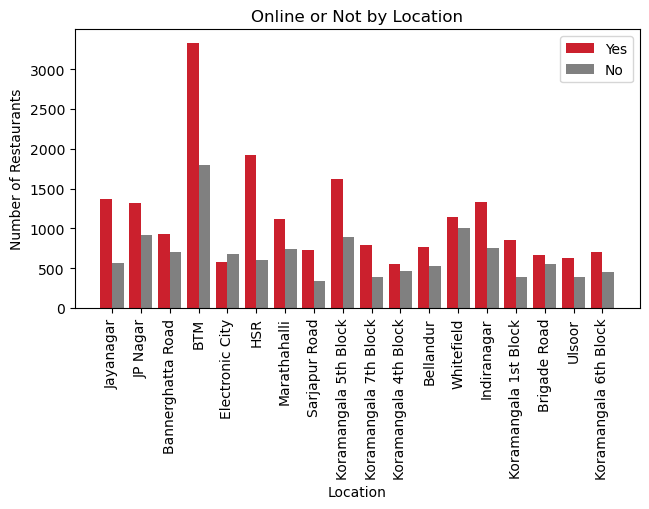

In [27]:
plt.style.use('fast')
indexes = np.arange(len(location_list))
plt.bar(indexes-0.2, yes_values, width=0.4, label='Yes', color=zomato_color_code)
plt.bar(indexes+0.2, no_values, width=0.4, label='No', color='grey')
plt.xticks(ticks=indexes, labels=location_list, rotation=90)
plt.tight_layout()
plt.legend()
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.title('Online or Not by Location')
plt.show()

## Handling 'book_table' feature

In [30]:
df['book_table']

0        Yes
1         No
2         No
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715    Yes
51716     No
Name: book_table, Length: 51717, dtype: object

In [31]:
df.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

'book_table' feature has no np.nan values

## *Plotting Table booking available or not Bar Chart*

In [32]:
index = df.book_table.value_counts().index
values = df.book_table.value_counts().values

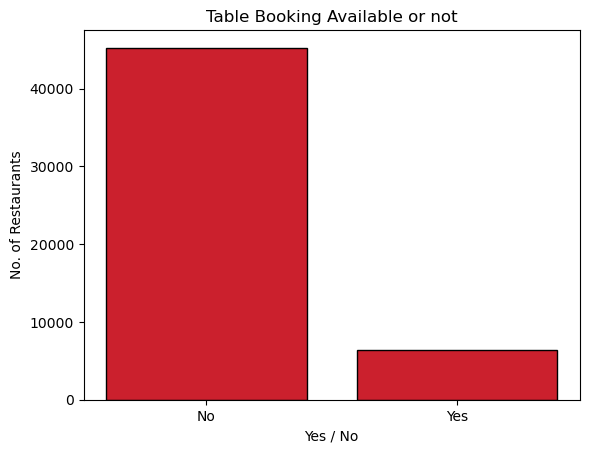

In [33]:
plt.bar(index, values, color=zomato_color_code, edgecolor='black')
plt.title('Table Booking Available or not')
plt.xlabel('Yes / No')
plt.ylabel('No. of Restaurants')
plt.show()